In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1599, 11)
(1599,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_tr1=to_categorical(y_tr)
y_te1=to_categorical(y_te)
print(y_tr1.shape)
print(y_te1.shape)

(1199, 9)
(400, 9)


In [12]:
m1= Sequential()  
m1.add(Dense(152,activation='relu',input_dim=11))
m1.add(Dense(76,activation='relu'))
m1.add(Dense(9,activation='sigmoid'))
m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

2022-05-10 19:58:11.140394: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
h1=m1.fit(x_tr,y_tr1,epochs=15,validation_data=(x_te,y_te1))

Epoch 1/15
38/38 [==============================] - 1s 8ms/step - loss: 0.3628 - accuracy: 0.3862 - val_loss: 0.2231 - val_accuracy: 0.5050
Epoch 2/15
38/38 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.4654 - val_loss: 0.2208 - val_accuracy: 0.4450
Epoch 3/15
38/38 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.4912 - val_loss: 0.2039 - val_accuracy: 0.5175
Epoch 4/15
38/38 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.4954 - val_loss: 0.2049 - val_accuracy: 0.5450
Epoch 5/15
38/38 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.4829 - val_loss: 0.2004 - val_accuracy: 0.5400
Epoch 6/15
38/38 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.5129 - val_loss: 0.2036 - val_accuracy: 0.5600
Epoch 7/15
38/38 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.4921 - val_loss: 0.1997 - val_accuracy: 0.5825
Epoch 8/15
38/38 [==

In [14]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
10,0.212881,0.505421,0.200449,0.5625,10
11,0.208416,0.512093,0.196078,0.5725,11
12,0.204894,0.514596,0.202093,0.5875,12
13,0.208464,0.503753,0.197532,0.5250,13
14,0.207457,0.516264,0.194673,0.5925,14


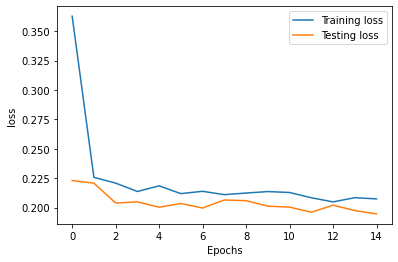

In [15]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

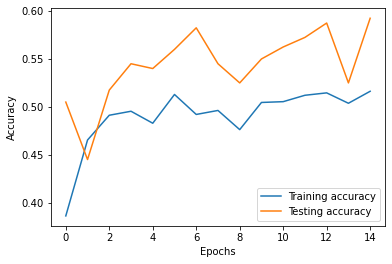

In [16]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
ypred_m1=m1.predict(x_te)
print(ypred_m1)

[[1.64806843e-04 1.27375126e-04 9.62236372e-05 ... 4.26964670e-01
  2.44555086e-01 1.21743679e-02]
 [3.92240286e-03 1.32083893e-03 1.18169188e-03 ... 3.21832538e-01
  1.62372708e-01 3.19975019e-02]
 [1.63591377e-10 1.97350425e-09 2.11742246e-09 ... 4.50221360e-01
  1.45579934e-01 5.11768521e-05]
 ...
 [2.03061104e-03 7.59631395e-04 6.81966543e-04 ... 3.66270959e-01
  1.50258303e-01 2.60204375e-02]
 [8.00088037e-06 9.93082540e-06 1.11437521e-05 ... 6.05864823e-01
  2.03286976e-01 2.23690867e-02]
 [2.89456693e-06 1.04360406e-05 7.95913729e-06 ... 5.31448245e-01
  1.00132406e-01 1.61090493e-03]]


In [19]:
ypred_m1=[np.argmax(i) for i in ypred_m1]
print(ypred_m1)

[6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 

In [20]:
cm_m1=confusion_matrix(y_te,ypred_m1)
print(cm_m1)

[[  0   0   1   0   0   0]
 [  0   0  11   3   0   0]
 [  0   0 140  39   2   0]
 [  0   0  57  94   0   0]
 [  0   0   4  42   3   0]
 [  0   0   0   4   0   0]]


In [21]:
print(classification_report(y_te,ypred_m1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.66      0.77      0.71       181
           6       0.52      0.62      0.56       151
           7       0.60      0.06      0.11        49
           8       0.00      0.00      0.00         4

    accuracy                           0.59       400
   macro avg       0.30      0.24      0.23       400
weighted avg       0.57      0.59      0.55       400



/Users/mananjaykumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mananjaykumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mananjaykumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu